# Cleaning candidatos

<a id = 'table'> </a>
## Table of contents

- Part I - Gathering the data
    - [Key Points](#key)
    - [Converting DTA to CSV file](#dta)
    - [Reading the CSV file](#read)    

- Part II - Assessing and cleaning
    - [Exploring the table](#explore)
    - [Making copies](#copies)
    - [Assesment and cleaning](#clean)
    - [Storing Data](#store)
    
- Part III - Analysis and visualization
    - [¿Cuál es el porcentaje de colocación?](#colocacion)
    - [¿En cuáles programas se originan las postulaciones?](#programa)
    - [Estatus final de vínculo](#vinculo)

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import sys

# for visualizing NAN
import missingno as msno
%matplotlib inline

# for visualizing all columns
pd.options.display.max_columns = None


<a id='key'></a>
[Return to Table of Contents](#table)

## Key Points for assessing and cleaning

- The BID2.CANDIDATO.dta file contains almost 2,350,000 records and 159 fields (columns).
- The analysis will focus on the next federal entities of the SNE ofices: Chiapas, Nuevo León, Jalisco, Veracruz, Ciudad de México, and Estado de México.
- Also, the analysis will be delimited to the next fields: 
    - 0   id
    - 1   id_solicitante
    - 2   entidadfed_sne
    - 4   sexo
    - 6   edad
    - 8   edocivil 
    - 9   cedo_domicilio
    - 11  nomb_localidad_domicilio
    - 14  escolaridad
    - 15  carrera
    - 16  sit_academica
    - 19  idioma
    - 54  qempleobusca
    - 55  salariopretente
    - 60  tipoexperiencia
    - 61  disp_viajar
    - 62  disp_vivir
    - 70  funciones    
    - 71  trabajaactualmente
    - 72  motivo
    - 73  fchcomienzo_busqueda
    - 119 clen_idcvelengua
    - 120 tipodiscapacidad
    - 143 id_ocupacion
    - 144 ocupacion
    - 145 id_area
    - 146 area
    - 147 id_subarea
    - 148 subarea
    - 157 colocados
    - 158 estatus_candidato_colocados

<a id='dta'></a>
[Return to Table of Contents](#table)
## Converting DTA to CSV file

In [12]:
#  First we create a reader with a small chunk in order to know the column names
my_stata_reader = pd.read_stata('BID2.CANDIDATO.dta', chunksize=2)
my_stata_reader._encoding = 'utf-8'
my_stata_reader.variable_labels()

{'id': 'ID',
 'id_solicitante': 'ID_SOLICITANTE',
 'entidadfed_sne': 'ENTIDADFED_SNE',
 'fch_registro': 'FCH_REGISTRO',
 'sexo': 'SEXO',
 'tsol_fch_nacimiento_2': 'TSOL_FCH_NACIMIENTO_2',
 'edad': 'EDAD',
 'cedo_nacimiento': 'CEDO_NACIMIENTO',
 'edocivil': 'EDOCIVIL',
 'cedo_domicilio': 'CEDO_DOMICILIO',
 'cmun_nombre_domicilio': 'CMUN_NOMBRE_DOMICILIO',
 'nomb_localidad_domicilio': 'NOMB_LOCALIDAD_DOMICILIO',
 'datosconfidenciales': 'DATOSCONFIDENCIALES',
 'cod_postal_domicilio': 'COD_POSTAL_DOMICILIO',
 'escolaridad': 'ESCOLARIDAD',
 'carrera': 'CARRERA',
 'sit_academica': 'SIT_ACADEMICA',
 'tsol_prospera': '',
 'tsol_prospera_num': '',
 'idioma': 'IDIOMA',
 'porcj_idioma': 'PORCJ_IDIOMA',
 'certificacion': 'CERTIFICACION',
 'idioma2': 'IDIOMA2',
 'porcj_idioma2': 'PORCJ_IDIOMA2',
 'certif_idioma2': 'CERTIF_IDIOMA2',
 'idioma3': 'IDIOMA3',
 'certif_idioma3': 'CERTIF_IDIOMA3',
 'porcj_idioma3': 'PORCJ_IDIOMA3',
 'habilidad': 'Habilidad',
 'procesadortextos': 'ProcesadorTextos',
 'hoja

In [2]:
# The my_stata_reader object allows us reading the big dta file by chunks
# filtering by the columns that we need 
my_stata_reader = pd.read_stata('BID2.CANDIDATO.dta', chunksize=10000, 
                                columns=['id','id_solicitante', 'entidadfed_sne', 'sexo', 'edad', 'edocivil', 
                                         'cedo_domicilio', 'nomb_localidad_domicilio','escolaridad', 'carrera', 
                                         'sit_academica', 'idioma', 'qempleobusca', 'salariopretente',
                                         'tipoexperiencia', 'disp_viajar', 'disp_vivir', 'funciones', 
                                         'trabajaactualmente', 'motivo', 'fchcomienzo_busqueda', 'clen_idcvelengua',
                                         'tipodiscapacidad', 'id_ocupacion', 'ocupacion', 'id_area', 'area',
                                         'id_subarea', 'subarea', 'colocados', 'estatus_candidato_colocados'])
my_stata_reader._encoding = 'utf-8'

In [9]:
# start y end will measure time
start = time.time()
first = True

# for each chunk it will do the next:
for chunk in my_stata_reader:
    if first:        # only append the header if it is the first chunk:
        # filtering the rows by the given values for entidadfed_sne
        filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
        z = chunk[filter_rows]
        z.to_csv('candidatos.csv', mode='a', index=False, header=True)  #‘a’ append
        print('.', end = '')
        first = False
        
    # Omit the header for the next chunks
    # filtering the rows by the given values for entidadfed_sne
    # filter_rows es una lista de bools
    filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
    z = chunk[filter_rows]    
    z.to_csv('candidatos.csv', mode='a', index=False, header=False) #‘a’ append.
    # Print a dot each time a chunk is appended
    print('.', end = '')
end = time.time()
print (('Total time: ') + str(end - start))

...........................................................................................................................................................................................................................................Total time: 200.50592827796936


In [3]:
# Verifiquemos el tamanio del CSV
filesize= os.stat('candidatos.csv').st_size
print(filesize)

547241419


<a id='read'></a>
[Return to Table of Contents](#table)
## Reading the CSV

The successful use of pd.read_csv may vary because of the <b>file size, type of processor, memory, code,</b> or some other variables.

If the code runs out of memory, you can try reading in chunks.

In [2]:
candidatos = pd.read_csv('candidatos.csv')
candidatos.head(1)

/home/liliana/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
0,2347459,501,NUEVO LEON,MASCULINO,31,SOLTERO (A),HIDALGO,HUEJUTLA DE REYES,SIN INSTRUCCIÓN,Ninguna,ESTUDIANTE,NINGUNO,"Auxiliar, ayudante o aprendiz de rotulista",3000.0,NaN,NO,NO,NaN,NO,Ajuste de personal,1999-01-01,No,Ninguna,214301,Trabajadora social,17,SECTOR SALUD / MEDICINA,101,ASESORAMIENTO PSICOLÓGICO Y TRABAJO SOCIAL,1,SI


<a id='explore'></a>
[Return to Table of Contents](#table)
## Exploring the table


In [23]:
candidatos.sample(5)

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
868276,763158,1158413202,NUEVO LEON,MASCULINO,53,NO ESPECIFICADO,NUEVO LEON,CIUDAD BENITO JUAREZ,PRIMARIA,Ninguna,NINGUNO,NINGUNO,Auxiliar de limpieza,3800.0,limpieza,NO,NO,NaN,NO,NaN,2016-08-03,NO,Ninguna,962101,Auxiliar de limpieza,31,OFICIOS Y SERVICIOS,229,SERVICIOS DE LIMPIEZA,1,SI
774899,956789,1128814702,CIUDAD DE MEXICO,FEMENINO,34,SOLTERO (A),CIUDAD DE MÉXICO,GUSTAVO A. MADERO,PREPA O VOCACIONAL,No especificado de nombre de carrera técnica o...,DIPLOMA O CERTIFICADO,NINGUNO,Empleado administrativo,4600.0,NaN,NO,NO,NaN,NO,NaN,2016-05-02,NO,Ninguna,251113,Empleado administrativo,2,ADMINISTRACIÓN,5,ADMINISTRACIÓN GENERAL,1,SI
65697,2100028,232862301,JALISCO,FEMENINO,22,SOLTERO (A),JALISCO,JAMAY,SABER LEER Y ESCRIBIR,Ninguna,NINGUNO,NINGUNO,Joyero,2000.0,NINGUNA,SI,SI,ENFERMERA,NO,Retiro voluntario,2016-04-03,No,Ninguna,722301,Joyero,31,OFICIOS Y SERVICIOS,210,"ARTESANIA EN PRODUCTOS DE METAL, MADERA, VIDRI...",1,SI
1006660,515807,1195751502,CIUDAD DE MEXICO,MASCULINO,60,CASADO (A),JALISCO,LA JOYA,CARRERA TÉCNICA,No especificado de nombre de carrera técnica o...,DIPLOMA O CERTIFICADO,NINGUNO,Jefe comercial,10000.0,CAJERO DE TIENDA DEPARTAMENTA,NO,NO,NaN,NO,NaN,2017-10-31,NO,Ninguna,171105,Jefe comercial,28,VENTAS,193,COORDINACIÓN DE VENTAS,1,SI
751568,999926,1122404102,CIUDAD DE MEXICO,FEMENINO,28,CASADO (A),JALISCO,TONALA,PREPA O VOCACIONAL,No especificado de nombre de carrera técnica o...,DIPLOMA O CERTIFICADO,NINGUNO,Cajero,6500.0,CAJA,NO,NO,NaN,NO,NaN,2016-04-11,NO,Ninguna,312101,Cajero,5,SERVICIOS BANCARIOS Y FINANCIEROS,18,CAJA,1,SI


In [14]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265855 entries, 0 to 1265854
Data columns (total 31 columns):
id                             1265855 non-null int64
id_solicitante                 1265855 non-null int64
entidadfed_sne                 1265855 non-null object
sexo                           1265855 non-null object
edad                           1265855 non-null int64
edocivil                       1265855 non-null object
cedo_domicilio                 1265855 non-null object
nomb_localidad_domicilio       1265855 non-null object
escolaridad                    1265855 non-null object
carrera                        1265855 non-null object
sit_academica                  1265855 non-null object
idioma                         1265855 non-null object
qempleobusca                   1265855 non-null object
salariopretente                1265855 non-null float64
tipoexperiencia                535861 non-null object
disp_viajar                    1265855 non-null object
disp_vivir

In [19]:
candidatos[candidatos.duplicated()].sort_values(by='nomb_localidad_domicilio')

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
1802,2347194,206501,CHIAPAS,MASCULINO,74,VIUDO (A),CHIAPAS,26 DE OCTUBRE,SABER LEER Y ESCRIBIR,Ninguna,NINGUNO,NINGUNO,Panadero,2500.0,PANADERO,NO,NO,NaN,NO,Nunca ha trabajado,2016-02-15,No,Ninguna,751301,Panadero,31,OFICIOS Y SERVICIOS,214,ELABORACIÓN Y PROCESAMIENTO DE ALIMENTOS Y BEB...,1,SI
1791,2347255,172401,CHIAPAS,MASCULINO,85,DIVORCIADO (A),CHIAPAS,26 DE OCTUBRE,SABER LEER Y ESCRIBIR,Ninguna,NINGUNO,NINGUNO,Panadero,2500.0,PANADERIA,NO,NO,NaN,NO,Nunca ha trabajado,2016-07-15,No,Ninguna,751301,Panadero,31,OFICIOS Y SERVICIOS,214,ELABORACIÓN Y PROCESAMIENTO DE ALIMENTOS Y BEB...,1,SI
3509,2337795,12374701,JALISCO,FEMENINO,37,DIVORCIADO (A),MORELOS,3RA. AMPLIACION LAZARO CARDENAS,PRIMARIA,Ninguna,DIPLOMA O CERTIFICADO,NINGUNO,Fumigador agrícola (cultivos),6000.0,CASI TODO EL TIEMPO HE TRABAJADO EN LA FUMIGAC...,NO,NO,NaN,NO,Ajuste de personal,2013-10-29,No,Ninguna,261302,Fumigador agrícola (cultivos),15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO
3502,2337811,12342201,CIUDAD DE MEXICO,FEMENINO,31,SOLTERO (A),CIUDAD DE MÉXICO,AA MILPA ALTA,CARRERA TÉCNICA,Alimentos,DIPLOMA O CERTIFICADO,NINGUNO,Asistente ejecutiva,4250.0,NaN,NO,NO,NaN,NO,Nunca ha trabajado,2013-01-20,NO,Ninguna,311101,Secretaria,3,APOYO DE OFICINA,6,ASISTENCIA EJECUTIVA Y/O PERSONAL,1,SI
3533,2337714,12555101,CIUDAD DE MEXICO,FEMENINO,35,SOLTERO (A),CIUDAD DE MÉXICO,AA MILPA ALTA,PREPA O VOCACIONAL,Administración,DIPLOMA O CERTIFICADO,INGLÉS,Administrador,2500.0,CULTIVO DE INVERNANDERO,NO,NO,NaN,NO,Nunca ha trabajado,2016-05-01,No,Ninguna,199902,Administrador,2,ADMINISTRACIÓN,5,ADMINISTRACIÓN GENERAL,1,SI
3460,2337908,12113201,JALISCO,MASCULINO,48,CASADO (A),GUERRERO,ACAQUILA,SIN INSTRUCCIÓN,Ninguna,NO ESPECIFICADO,NINGUNO,Agricultor,4000.0,JORNALERO,SI,SI,JORNALERO,NO,Termino de contrato,2013-01-05,0,Ninguna,611601,Agricultor,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO
3340,2338427,11422201,JALISCO,FEMENINO,42,CASADO (A),GUERRERO,ACAQUILA,PRIMARIA,Ninguna,NINGUNO,NINGUNO,Peón jornalero agrícola,6000.0,JORNALERO,SI,SI,JORNALERO,NO,Termino de contrato,2014-08-09,"Si, NAHUAT",Ninguna,911107,Peón jornalero agrícola,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,87,AGRONOMÍA Y SERVICIOS AGRÍCOLAS,0,NO
3251,2338734,11022201,JALISCO,MASCULINO,31,CASADO (A),GUERRERO,ACAQUILA,SIN INSTRUCCIÓN,Ninguna,NO ESPECIFICADO,NINGUNO,Agricultor,4250.0,NaN,NO,NO,JORNALERO,NO,Termino de contrato,2013-01-01,NO,Ninguna,313201,Almacenista,24,"TRANSPORTE, DISTRIBUCIÓN Y LOGÍSTICA",163,ADQUISICIONES E INVENTARIO,0,NO
3332,2338444,11395301,JALISCO,FEMENINO,40,CASADO (A),GUERRERO,ACATEMPA,SIN INSTRUCCIÓN,Ninguna,NO ESPECIFICADO,NINGUNO,Agricultor,4250.0,NaN,NO,NO,JORNALERO,NO,Termino de contrato,2013-01-06,NO,Ninguna,611601,Agricultor,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO
3281,2338591,11210301,JALISCO,MASCULINO,44,CASADO (A),GUERRERO,ACATEMPA,PRIMARIA,Ninguna,NINGUNO,NINGUNO,Agricultor,6000.0,CORTE DE CAÑA,SI,SI,CORTE DE CAÑA,NO,Termino de contrato,2014-01-08,0,Ninguna,611601,Agricultor,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO


In [11]:
candidatos.entidadfed_sne.unique()

array(['NUEVO LEON', 'CHIAPAS', 'VERACRUZ', 'JALISCO', 'CIUDAD DE MEXICO',
       'MEXICO, ESTADO DE'], dtype=object)

In [25]:
candidatos.sexo.unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [3]:
candidatos.groupby('edad')['id'].nunique()


edad
3         3
4         2
7         1
9         3
10        1
11        1
13        2
14        1
15        6
16       22
17      344
18     3929
19    11082
20    23908
21    32622
22    40658
23    55466
24    73174
25    82054
26    83177
27    78600
28    71948
29    63463
30    55912
31    49820
32    44175
33    39819
34    36437
35    34059
36    31312
      ...  
67     1430
68     1264
69     1038
70      918
71      869
72      666
73      610
74      504
75      444
76      409
77      335
78      259
79      227
80      166
81      138
82      137
83      116
84       87
85       65
86       59
87       44
88       34
89       13
90       14
91       11
92       15
93        9
94        3
95        1
96        1
Name: id, Length: 90, dtype: int64

In [31]:
candidatos.edocivil.unique()

array(['SOLTERO (A)', 'DIVORCIADO (A)', 'CASADO (A)', 'VIUDO (A)',
       'UNION LIBRE', 'NO ESPECIFICADO'], dtype=object)

In [4]:
a = candidatos.cedo_domicilio.unique()
print(sorted(a))

['AGUASCALIENTES                     ', 'BAJA CALIFORNIA                    ', 'BAJA CALIFORNIA SUR                ', 'CAMPECHE                           ', 'CHIAPAS                            ', 'CHIHUAHUA                          ', 'CIUDAD DE MÉXICO', 'COAHUILA                           ', 'COLIMA                             ', 'DURANGO                            ', 'GUANAJUATO                         ', 'GUERRERO                           ', 'HIDALGO                            ', 'JALISCO                            ', 'MEXICO, ESTADO DE                  ', 'MICHOACAN                          ', 'MORELOS                            ', 'NAYARIT                            ', 'NUEVO LEON                         ', 'OAXACA                             ', 'PUEBLA                             ', 'QUERETARO                          ', 'QUINTANA ROO                       ', 'SAN LUIS POTOSI                    ', 'SINALOA                            ', 'SONORA                             ', 'TAB

In [30]:
candidatos.nomb_localidad_domicilio.unique().tolist()

['HUEJUTLA DE REYES',
 'SAN CRISTOBAL DE LAS CASAS',
 'REFORMA',
 '26 DE OCTUBRE',
 'BENITO JUAREZ',
 'PALENQUE',
 'TAPACHULA DE CORDOVA Y ORDOÑEZ',
 'MECAYAPAN',
 'IXHUAPAN',
 'LA INDEPENDENCIA',
 'JOSE MARIA PINO SUAREZ',
 'TONALAPA',
 'COSMIQUILOYAN',
 'MARTINEZ DE LA TORRE',
 'TRES CERROS',
 'TLAPACOYAN',
 'ZOZOCOLCO DE GUERRERO',
 'PICHUCALCO',
 'VILLAFLORES',
 'TATAHUICAPAN',
 'CERRO DE LA PALMA',
 'YAJALON',
 'ZOZOCOLCO DE HIDALGO',
 'ENCINO AMARILLO',
 'TZAJALCHEN',
 'NUEVO RESPLANDOR',
 'EMILIANO ZAPATA',
 'LA CONCORDIA',
 'EL RETIRO',
 'SOCOLTENANGO',
 'JIQUIPILAS',
 'CHILON',
 'LA LIBERTAD',
 'SITALA',
 'TENAMAXTLAN',
 'ANAYAL NUMERO DOS',
 'PIHUAMO',
 'EL CALICON',
 'SAN JUAN CANCUC',
 'CRUZTON',
 'TRES CRUCES DOS',
 'JUCHITLAN',
 'NUEVA INDEPENDENCIA',
 'LAS FLORES',
 'CAXUXUMAN',
 'HUIXTLA',
 'OTRA BANDA',
 'VEGA CHICA',
 'PIEDRA PINTA',
 'EL COLON',
 'ALLENDE',
 'ACATZACATL',
 'TENEJAPA',
 'CINTALAPA DE FIGUEROA',
 'SAN LORENZO',
 'LA MAGDALENA CONTRERAS',
 'LOS FRESNOS'

In [91]:
candidatos.escolaridad.unique()

array(['SIN INSTRUCCIÓN', 'LICENCIATURA', 'PROFESIONAL TÉCNICO (CONALEP)',
       'PREPA O VOCACIONAL', 'SECUNDARIA/SEC. TÉCNICA',
       'SABER LEER Y ESCRIBIR', 'PRIMARIA', 'T. SUPERIOR UNIVERSITARIO',
       'CARRERA TÉCNICA', 'CARRERA COMERCIAL', 'MAESTRÍA', 'DOCTORADO'],
      dtype=object)

In [90]:
candidatos.carrera.unique().tolist()

['Ninguna',
 'Contabilidad',
 'Informática administrativa',
 'No especificado de nombre de carrera técnica o comercial de nivel medio superior',
 'Administración',
 'Contador público',
 'No especificado de nombre de carrera técnica o comercial de nivel superior',
 'Contabilidad pública',
 'Derecho',
 'Tecnologías de la información',
 'Salud comunitaria',
 'Administración empresarial',
 'Contaduría pública',
 'Administración de empresas',
 'Contabilidad administrativa',
 'Turismo',
 'No especificado de nombre de carrera técnica o comercial de nivel básico',
 'Auxiliar de contabilidad',
 'Mercadotecnia',
 'Letras latinoamericanas',
 'Economía',
 'Navegación y pesca marina',
 'Carpintería',
 'Químico industrial',
 'Administración de recursos humanos',
 'Agronomía',
 'Negocios internacionales',
 'Capturista de datos',
 'Computación',
 'Auxiliar de enfermería',
 'Ingeniería electrónica',
 'Comercio',
 'Agricultura',
 'Administración aeroportuaria',
 'Pedagogía',
 'Agrícola (cultivos básicos

In [94]:
candidatos.sit_academica.unique()

array(['ESTUDIANTE', 'PASANTE', 'DIPLOMA O CERTIFICADO', 'NINGUNO',
       'TRUNCA', 'NO ESPECIFICADO', 'TITULADO'], dtype=object)

In [95]:
candidatos.idioma.unique()

array(['NINGUNO', 'INGLÉS', 'PORTUGUÉS', 'FRANCÉS', 'ITALIANO', 'ALEMÁN',
       'JAPONÉS', 'CHINO'], dtype=object)

In [28]:
candidatos.tipoexperiencia.unique().tolist()

[nan,
 'NINGUNA',
 'NINGUNO',
 'PANADERIA',
 'SIEMBRA Y COSECHA',
 'CULTIVO',
 'MANEJO DE CULTIVO',
 'XXXX',
 'PANADERO',
 'CULTIVO Y SIEMBRA',
 'LABORES DEL CAMPO',
 'CULTIVO DE CHILE',
 'SD',
 'CORTE DE UVA Y CITRICOS',
 'CORTE DEUVA',
 'CULTIVO DE UVA',
 'CULTIVO DE MAIZ Y FRIJOL',
 'CORTE DE UVA Y NARANJA',
 'CULTIVO DE MAIZ UVA PIMIENTA CAFE',
 'ATENCION A CLIENTES Y VENTAS',
 'ADQUIRIDA POR EXPERIENCIA LABORAL',
 'CULTIVO DE HORTALIZA',
 'CORTE Y MANEJO DE COSECHAS',
 'COSECHA DE HORTALIAS',
 'CORTE DE TOMATE',
 'CORTE DE NARANJA Y UVA',
 'CORTE Y PREPARACION DE SUELO',
 'ELABORACION DE REPORTES FINANCIEROS, ELABORACION DE FACTURAS, CONCILIACIONES BANCARIAS, VENTAS, ARCH',
 'ELABORACION DE DOCUMENTOS DE TEXTO,  A TENCION A CLIENTES, ASESORIA JURIDICA, REVISION DE EXPEDIENTE',
 'PROCESO DE ENSEÑANAZ APRENDIZAJE',
 'COSECHAR',
 'COSECHA DE MAIZ',
 'ATENCION A CLIENTES, CONTROL DE ENTRADAS Y SALIDAS, ADMINISTRATIVAS, ELABORACION DE FACTURAS',
 'JORNALERO AGRICOLA',
 'AGRICULTOR',
 '

In [104]:
candidatos.disp_viajar.unique()

array(['NO', 'SI'], dtype=object)

In [105]:
candidatos.disp_vivir.unique()

array(['NO', 'SI'], dtype=object)

In [111]:
candidatos.funciones.unique().tolist()

[nan,
 'CORTE DE TOMATE',
 'CORTE Y REPLANTACION',
 'LABORES DE CAMPO',
 'XXXX',
 'SD',
 'XXXXX',
 'CORTE DE UVAS',
 'CULTIVO DE UVA',
 'CULTIVO DE CAFE',
 'CULTIVO DE HORTALIZAS',
 'CORTE DE UVA',
 'CULTIVO Y COSECHA DE TOMATE',
 'NINGUNO',
 'COBRANZAS, CAPTURA DE INFORMACION, ATENCION A CLIENTES',
 'XXXXXXXXXXXX',
 'LIMPIEZA DE MAIZ',
 'ACOMODO DE MERCANCIAS',
 'JORNALERO AGRICOLA',
 'CULTIVO DE HORTALIZA',
 'CORTE Y DESOJE DE TOMATES',
 'CORTE',
 'AGRICULTURA',
 'SIN DATOS',
 'CORTE DE PEPINO Y CHILE',
 'HACEO DE LA CASA',
 'SIEMBRA Y COSECHA',
 'CORTE Y DESOJE DE TOMATE',
 'XXXXXXX',
 '0',
 'CULTIVO Y COSECHA DE UVA',
 'COSECHA DE UVA',
 'CULTIVOS',
 'COSECHA DE UVA CALABAZA',
 'SSS',
 'PROMOTORA VENTA DE LIBROS Y ASISTENCIA A FERIAS',
 'AGRICOLA',
 'ECOBRO DE PAGOS Y SERVICIOS OFRECIDOS POR LA EMPRESA A LOS CLIENTES EN EL AREA DE PUNTO DE VENTA',
 'JORNALERO',
 'ACTIVIDAD DE CAMPO',
 'OBRERO',
 'ACTIVIDADES DE CAMPO',
 'NO',
 'DESBRADO',
 'XXXXXXXX',
 'RALEO Y PIZCA DE VID',
 'AUX

In [21]:
candidatos.trabajaactualmente.unique()

array(['NO', 'SI'], dtype=object)

In [20]:
candidatos.motivo.unique()

array(['Ajuste de personal', 'Nunca ha trabajado', 'Cambio de trabajo',
       'Termino de contrato', 'Despido', 'Tener más de un empleo',
       'Retiro voluntario', 'Cerró/quebró la fuente de trabajo',
       'Otro Especifique: JORNALERO AGRICOLA', nan,
       'Otro Especifique: MIGRAR PARA GANAR',
       'Otro Especifique: SEPARACION VOLUNTARIA',
       'Otro Especifique: MIGRAR', 'Otro Especifique: NO APLICA',
       'Otro Especifique: NECESITO DINERO', 'Otro Especifique: OTRO',
       'Otro Especifique: MANUTENCION DE HIJOS',
       'Otro Especifique: JORNALERO AGRÍCOLA',
       'Otro Especifique: NO INDICA', 'Otro Especifique: AUTOEMPLEARME',
       'Otro Especifique: TERMINO DE CONTRATO',
       'Otro Especifique: FALTA DE HONESTIDAD DE LA EMPRESA',
       'Otro Especifique: AGRICULTOR',
       'Otro Especifique: PARA OBTENER INGRESOS ECONOMICOS',
       'Otro Especifique: PORQUE YA CUENTO CON TIEMPO DISPONIBLE PARA TRABAJAR',
       'Otro Especifique: CORTE DE CAÑA', 'Otro Espe

In [4]:
candidatos.fchcomienzo_busqueda.unique()

array(['1999-01-01', '2016-02-19', '2016-04-20', ..., '2018-05-02',
       '2018-05-04', '2000-11-14'], dtype=object)

In [109]:
candidatos.clen_idcvelengua.unique()

array(['No', 'NO', 'Si, NAHUAT', '0', 'Si, TZELTZ', 'Si, TOTONA',
       'Si, TZOTZI', 'Si, POPOLU', 'Si, TOJOLA', 'Si, PUREPE',
       'Si, POPOLO', 'Si, CHOL', 'Si, HUASTE', 'Si, OTRAS ', 'Si, NO ESP',
       'Si, MIXTEC', 'Si, ZAPOTE', 'Si, MAZATE', 'Si, AGUACA',
       'Si, OTOMI', 'Si, MAZAHU', 'Si, DE LAL', 'Si, PAPAGO', 'Si, SERI',
       'Si, HUICHO', 'Si, CHINAN', 'Si, TRIQUI', 'Si, AMUZGO',
       'Si, MOTOCI', 'Si, ZOQUE', 'Si, MAYA', 'Si, MIXE', 'Si, CHATIN',
       'Si, TLAPAN', 'Si, CUCAPA', 'Si, MATLAT', 'Si, LACAND', 'Si, MAYO'],
      dtype=object)

In [5]:
candidatos.tipodiscapacidad.unique()

array(['Ninguna', 'Intelectual', 'Auditiva', 'Visual', 'Motora', 'Mental'],
      dtype=object)

In [6]:
candidatos.ocupacion.unique()

array(['Trabajadora social', 'Asistente de gerencia administrativa',
       'Auditor contable', ..., 'Conductor de tren (maquinista)',
       'Filólogo', 'Tejedor de canastos de carrizo'], dtype=object)

In [17]:
np.sort(candidatos.area.unique())

array(['ADMINISTRACIÓN', 'APOYO DE OFICINA', 'Administración',
       'Apoyo de Oficina', 'CALL CENTER Y SERVICIO AL CLIENTE',
       'CEO Y DIRECCIÓN GENERAL', 'CEO y Dirección General',
       'CIENCIAS Y TECNOLOGÍA', 'CONSERVACIÓN AGRÍCOLA Y ANIMALES',
       'CONSTRUCCIÓN', 'CONSULTORÍA Y ESTRATEGIA', 'CONTABILIDAD',
       'Call Center y Servicio al Cliente',
       'Conservación Agrícola y Animales', 'Construcción', 'Contabilidad',
       'DEPORTES Y RECREACIÓN', 'DISEÑO', 'Diseño',
       'EDUCACIÓN Y CAPACITACIÓN', 'Educación y capacitación',
       'GOBIERNO Y DEFENSA', 'Gobierno y Defensa',
       'INDUSTRIAS Y ACTIVIDADES CREATIVAS', 'INGENIERÍA',
       'INSTALACIÓN, MANTENIMIENTO, Y REPARACIÓN',
       'Industrias y actividades creativas', 'Ingeniería',
       'Instalación, Mantenimiento, y Reparación', 'LEGAL', 'Legal',
       'MANUFACTURA Y PRODUCCIÓN', 'MEDIOS DE COMUNICACIÓN Y PUBLICIDAD',
       'MERCADOTECNIA Y COMERCIALIZACIÓN', 'MINERÍA Y ENERGÍA',
       'Manufact

In [18]:
np.sort(candidatos.subarea.unique())

array(['ACABADOS (YESERO, AZULEJERO, PASTERO, ETC)', 'ACTUARÍA',
       'ADMINISTRACIÓN', 'ADMINISTRACIÓN / GESTIÓN / DIRECCIÓN',
       'ADMINISTRACIÓN BANCARIA', 'ADMINISTRACIÓN COMERCIAL Y VENTAS',
       'ADMINISTRACIÓN DE ESPACIOS',
       'ADMINISTRACIÓN DE LA PLANTA PRODUCTIVA',
       'ADMINISTRACIÓN DEL PERSONAL', 'ADMINISTRACIÓN GENERAL',
       'ADMINISTRACIÓN PÚBLICA', 'ADQUISICIONES E INVENTARIO',
       'AGENCIAS DE VIAJES / CONSULTORES',
       'AGENTES DE RECAUDACIÓN TRIBUTARIA',
       'AGRONOMÍA Y SERVICIOS AGRÍCOLAS',
       'AGROPECUARÍA Y SERVICIOS AVÍCOLAS,  GANADEROS , PECUARIOS Y APÍCOLAS',
       'ALIMENTARIA', 'ANÁLISIS ECONÓMICO',
       'ANÁLISIS SOCIAL Y ANTROPOLÓGICO',
       'APOYO A TERCERA EDAD Y DISCAPACIDAD', 'APOYO ESCOLAR',
       'APOYO Y COORDINACIÓN DE VOLUNTARIADO/PROMOTOR COMUNITARIO',
       'APOYO Y GESTIÓN EN OFICINAS LEGALES', 'APUESTAS Y JUEGOS DE AZAR',
       'ARQUITECTOS TECNOLÓGICOS', 'ARTES CREATIVAS',
       'ARTESANIA EN PRODUCTOS D

In [20]:
candidatos.colocados.unique()

array([1, 0, 2, 4, 3])

In [31]:
candidatos.estatus_candidato_colocados.unique()

array(['SI', 'NO'], dtype=object)

In [ ]:
#NaN in candidatos
candidatos = candidatos.replace("nan",np.nan)
msno.matrix(candidatos.sample(250));

<a id='copies'></a>
[Return to Table of Contents](#table)
## Making copies

The first step before any cleaning is **always make copies**

In [135]:
candidatos_clean = candidatos.copy()

<a id='clean'></a>[Return to Table of Contents](#table)
## Assesment and cleaning
#### Quality changes
1. [Wrong Datatypes](#datatypes)
2. [Remove the ending spaces in cedo_domicilio](#spaces)
3. [The value 'MEXICO, ESTADO DE' must be changed ](#edomex)
4. [Some candidates have unexpected values for `edad`.](#edad)
5. [Some values in `tipo_experiencia` can be unified](#unify) 
6. [Values in `clen_idcvelengua` must be completed](#complete_lenguas)
7. [`clen_idcvelengua` column name is not descriptive](#lengua_indigena)

#### Tidiness changes
Not a single so far.

<a id='datatypes'></a>
### 1. Wrong datatypes 


In [19]:
candidatos_clean.id =  candidatos_clean.id.astype('int32')

type(candidatos_clean.id[0])

numpy.int32

In [ ]:
#Convert to ordered categorical type with custom ordering:
cat_sexo = pd.api.types.CategoricalDtype(categories=['MASCULINO','FEMENINO'], ordered=True)
candidatos.sexo.astype(cat_sexo)


In [22]:
type(candidatos.sexo[0])

str

tipoexperiencia has some float values

In [138]:
candidatos_clean['tipoexperiencia'] = candidatos_clean['tipoexperiencia'].astype(str)

In [142]:
type(candidatos_clean['tipoexperiencia'][0])

str

<a id='spaces'></a>
### 2. Remove the ending spaces in `cedo_domicilio` 
Using str.strip() function

In [44]:
# with replace function
candidatos_clean.cedo_domicilio = candidatos_clean.cedo_domicilio.str.strip()

In [46]:
candidatos_clean.cedo_domicilio.unique()

array(['HIDALGO', 'ESTADO DE MEXICO', 'VERACRUZ', 'JALISCO', 'NUEVO LEON',
       'GUANAJUATO', 'QUINTANA ROO', 'GUERRERO', 'PUEBLA', 'ZACATECAS',
       'BAJA CALIFORNIA', 'YUCATAN', 'NAYARIT', 'QUERETARO',
       'BAJA CALIFORNIA SUR'], dtype=object)

<a id='edomex'></a>
### 3. The value 'MEXICO, ESTADO DE'  must be changed 
'ESTADO DE MEXICO' must be used instead of 'MEXICO, ESTADO DE', which is a better reading of the value.
Use replace function

In [47]:
candidatos_clean = candidatos_clean.replace({'entidadfed_sne': r'^[MEXICO, ESTADO DE].+'}, 
                                            {'entidadfed_sne': 'ESTADO DE MEXICO'}, regex = True )

In [48]:
candidatos_clean = candidatos_clean.replace({'cedo_domicilio': r'^[MEXICO, ESTADO DE].+'}, 
                                            {'cedo_domicilio': 'ESTADO DE MEXICO'}, regex = True )

In [49]:
# Verify change
candidatos_clean.entidadfed_sne.unique()

array(['NUEVO LEON', 'ESTADO DE MEXICO', 'VERACRUZ', 'JALISCO'],
      dtype=object)

In [51]:
candidatos_clean.cedo_domicilio.unique()

array(['HIDALGO', 'ESTADO DE MEXICO', 'VERACRUZ', 'JALISCO', 'NUEVO LEON',
       'GUANAJUATO', 'QUINTANA ROO', 'GUERRERO', 'PUEBLA', 'ZACATECAS',
       'BAJA CALIFORNIA', 'YUCATAN', 'NAYARIT', 'QUERETARO',
       'BAJA CALIFORNIA SUR'], dtype=object)

<a id='edad'></a>
### 4. Some candidates have unexpected values for `edad`.
Values from 3 to 15 years will be changed for the average age.

In [65]:
# The average age
candidatos_clean.edad.mean()

32.75689553700858

In [83]:
candidatos_clean.query('edad < 16')['id'].count()

0

In [77]:
a = np.array(candidatos_clean.edad.values.tolist())

In [78]:
candidatos_clean.edad = np.where(a < 16, 33, a)

In [79]:
candidatos_clean.query('edad < 16')

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados


<a id='unify'></a>
### 5. Some values in `tipoexperiencia` can be unified

Use the match function and regular expressions (regex)

In [184]:
a = candidatos_clean[candidatos_clean['tipoexperiencia'].str.match(pat = r'[\w]*NING', case=False)].tipoexperiencia

In [185]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(a.value_counts())

NINGUNA                                                                                                 23145
NINGUNO                                                                                                 13400
ninguno                                                                                                  1069
NINGUNO                                                                                                   486
NINGUNA                                                                                                   437
ninguna                                                                                                   277
Ninguno                                                                                                   144
ninguno                                                                                                    47
NINGUN                                                                                                     35
NINGUNIO  

In [201]:
candidatos_clean.tipoexperiencia = candidatos_clean.replace({'tipoexperiencia':r'[\w]*NING[\w]*'}, {'tipoexperiencia':'NINGUNA'}, regex=True)

In [202]:
a = candidatos_clean[candidatos_clean['tipoexperiencia'].str.match(pat = r'[\w]*NING', case=False)].tipoexperiencia
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(a.value_counts())

KeyError: '[nan nan nan ... nan nan nan] not in index'

In [203]:
# Verify tipo_vinculo
candidatos_clean[candidatos_clean['tipoexperiencia'].str.match(pat = r'[\w]*NING', case=False)].tipoexperiencia.value_counts()

KeyError: '[nan nan nan ... nan nan nan] not in index'

<a id='datatypes'></a>
### 1. Wrong datatypes 


<a id='store'></a>[Return to Table of Contents](#table)
## Storing Data

First, we'll get a sample of `postulaciones` to verify it is the way we need it.

In [45]:
postulaciones_clean.sample(5)

,trac_id,id_solicitante,id_oferta_empleo,id_empresa,fecha_vinculo,tipo_vinculo,estatusfinalvinculo,subprograma,anio
3224398,0,1187756002,2714017,15507290,2016-11-14 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
2649748,0,1095811502,2535242,15444673,2016-08-22 00:00:00,POSTULACIÓN,NO COLOCADO,SIISNE,2016
4107751,0,789287302,2498729,15422330,2016-07-25 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
963955,0,668813902,2604158,15097325,2016-09-17 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
5309524,0,1057416702,2654024,15486132,2016-10-18 00:00:00,POSTULACIÓN,COLOCADO,FERIAS,2016


Then proceed to save it. Make sure to specify index=False and utf-8 encoding.

utf-8 ensures that special characters in Spanish as accents and ñ will be saved.

In [36]:
postulaciones_clean.to_csv('postulaciones_clean.csv', index=False, encoding='utf-8')

<a id='colocacion'></a>
[Return to Table of Contents](#table)
## Analysis and visualization
After wrangling and cleaning data from `postulaciones` we can try some univariate exploration.

In this first attempt we are not adding the gender variable yet.

In [ ]:
# Run this line if you don't have the dataframe postulaciones_clean
postulaciones_clean = pd.read_csv('postulaciones_clean.csv', encoding='utf-8')

### ¿Cuál es el porcentaje de colocación?

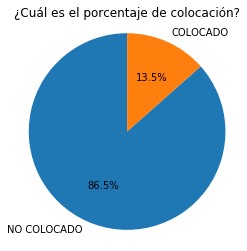

In [3]:
postulaciones_clean['estatusfinalvinculo'].value_counts().plot(kind = 'pie', startangle=90, autopct='%1.1f%%')
plt.axis('square')
plt.title('¿Cuál es el porcentaje de colocación?')
plt.ylabel('');

<a id='programa'></a>
[Return to Table of Contents](#table)
### ¿En cuáles programas se originan las postulaciones?


In [4]:
subprogramas_count = postulaciones_clean['subprograma'].value_counts()
subprogramas_count

PORTAL               4840986
SIISNE               1246746
FERIAS                191840
Abriendo Espacios       3565
BECATE                    49
MOV LAB INT               29
OTRO                      18
Name: subprograma, dtype: int64

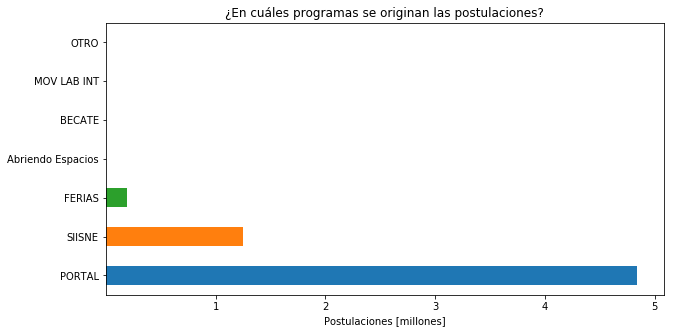

In [7]:
subprogramas_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿En cuáles programas se originan las postulaciones?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 5000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5]
plt.xticks(xticklocs, xticknames);

<a id='vinculo'></a>
[Return to Table of Contents](#table)
### ¿Qué proporciones tienen los diferentes vínculos?


In [13]:
vinculos_count = postulaciones_clean['tipo_vinculo'].value_counts()
vinculos_count

POSTULACIÓN    5897688
ENVÍO           385467
INSCRIPCIÓN         78
Name: tipo_vinculo, dtype: int64

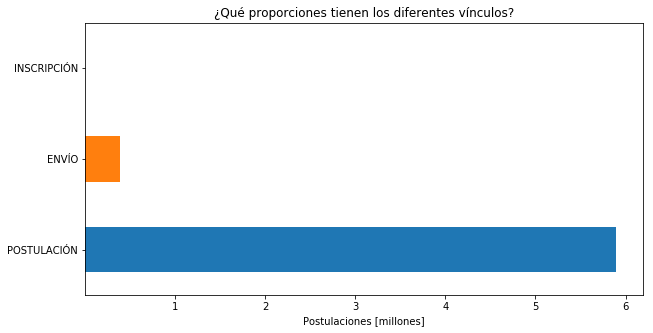

In [16]:
vinculos_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿Qué proporciones tienen los diferentes vínculos?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 6000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5,6]
plt.xticks(xticklocs, xticknames);

In [ ]:
from pywaffle import Waffle
calculated = postulaciones_clean['tipo_vinculo'].value_counts()

fig = plt.figure(FigureClass=Waffle, 
    rows=5,
    values = list(calculated.values),
    labels = list(calculated.index)
)

## References
pd.isin()
- https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

Obtener y filtrar datos de un dataframe
- http://pyciencia.blogspot.com/2015/05/obtener-y-filtrar-datos-de-un-dataframe.html
- https://medium.com/@rtjeannier/pandas-101-cont-9d061cb73bfc